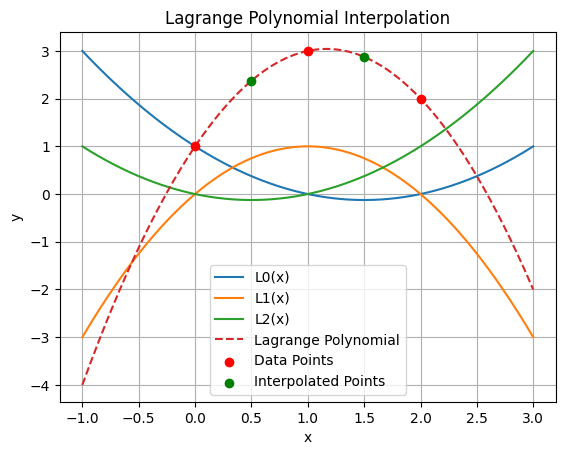

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([0, 1, 2])
y_data = np.array([1, 3, 2])

def lagrange_interpolation(x, x_data, y_data):
    n = len(x_data)
    result = 0
    for i in range(n):
        term = y_data[i]
        for j in range(n):
            if i != j:
                term *= (x - x_data[j]) / (x_data[i] - x_data[j])
        result += term
    return result

x_interp = [0.5, 1.5]

# Compute the polynomial values at x=0.5 and x=1.5
y_interp = [lagrange_interpolation(xi, x_data, y_data) for xi in x_interp]

# Plotting the cardinal functions
x_points = np.linspace(min(x_data) - 1, max(x_data) + 1, 400)
for i in range(len(x_data)):
    L_i = np.prod([(x_points - x_data[j]) / (x_data[i] - x_data[j]) for j in range(len(x_data)) if j != i], axis=0)
    plt.plot(x_points, L_i, label=f"L{i}(x)")

# Plot the Lagrange polynomial
y_poly = [lagrange_interpolation(xi, x_data, y_data) for xi in x_points]
plt.plot(x_points, y_poly, label="Lagrange Polynomial", linestyle="--")

# Plot the data points
plt.scatter(x_data, y_data, color='red', label='Data Points', zorder=5)

# Mark the interpolated points
plt.scatter(x_interp, y_interp, color='green', label='Interpolated Points', marker='o', zorder=5)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Polynomial Interpolation')
plt.legend()
plt.grid(True)
plt.show()


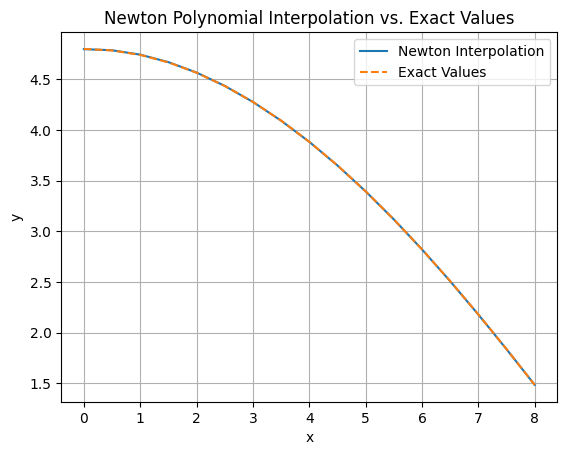

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([0.15, 2.30, 3.15, 4.85, 6.25, 7.95])
y_data = np.array([4.798, 4.491, 4.224, 3.473, 2.666, 1.519])


def divided_differences(x_data, y_data):
    n = len(x_data)
    F = np.zeros((n, n))
    F[:, 0] = y_data
    for j in range(1, n):
        for i in range(n - j):
            F[i][j] = (F[i + 1][j - 1] - F[i][j - 1]) / (x_data[i + j] - x_data[i])
    return F

def newton_interpolation(x, x_data, F):
    n = len(x_data)
    result = F[0][0]
    for j in range(1, n):
        term = F[0][j]
        for i in range(j):
            term *= (x - x_data[i])
        result += term
    return result

x_interp = np.arange(0, 8.1, 0.5)

# Compute Newton's divided differences
F = divided_differences(x_data, y_data)

# Evaluate the interpolated values
y_interp = [newton_interpolation(xi, x_data, F) for xi in x_interp]

# Calculate the "exact" values
exact_values = [4.8 * np.cos(np.pi * xi / 20) for xi in x_interp]

plt.plot(x_interp, y_interp, label="Newton Interpolation")
plt.plot(x_interp, exact_values, label="Exact Values", linestyle="--")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Newton Polynomial Interpolation vs. Exact Values')
plt.legend()
plt.grid(True)
plt.show()
